<a href="https://colab.research.google.com/github/Sid-9823/US-House-Price-Prediction/blob/main/Home_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Problem Statement**

**We have to find key factors that have influenced US home prices nationally over the last 20 years.**

### **Data Description**

**The dataset contains information such as year, population growth, density (per sq. km), GDP, poverty rate, crime rate, price of household sold.**

**Feature's Information :**
* ***YEAR*** : *year.*

* ***POPULATION GROWTH*** : *Population growth in last 20 years in US.*
* ***DENSITY( PER SQ. KM)*** : *People per square kilometer.*
* ***GDP (In billion)*** : *GDP of US in last 20 years.*
* ***POVERTY RATE (% Under US $5.50 Per Day)*** : *Percentage of the population living on less than 5 dollars a day.*
* ***CRIME RATE ( PER 100K POPULATION)*** : *Crime rate in last 20 years.*
* ***Price of house sold*** : *Median sales prices of houses sold for the US.*


In [ ]:
# Importing necessary libraries.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import export_graphviz
from datetime import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading our dataset.

df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/SID.xlsx')

In [ ]:
# Printing first five rows.

df.head()

,YEAR,POPULATION GROWTH,DENSITY ( PER SQ. KM),GDP (In billion),POVERTY RATE (% Under US $5.50 Per Day),CRIME RATE ( PER 100K POPULATION),PRICE OF HOUSE SOLD
0,2020,335942003,34.17,21060.47,0.012,6.42,358700
1,2019,334319671,34.00,21380.98,0.017,4.99,327100
2,2018,332140037,33.78,20533.06,0.017,4.93,322800
3,2017,329791231,33.54,19477.34,0.020,5.24,337900
4,2016,327210198,33.28,18695.11,0.020,5.32,310900


<Axes: >

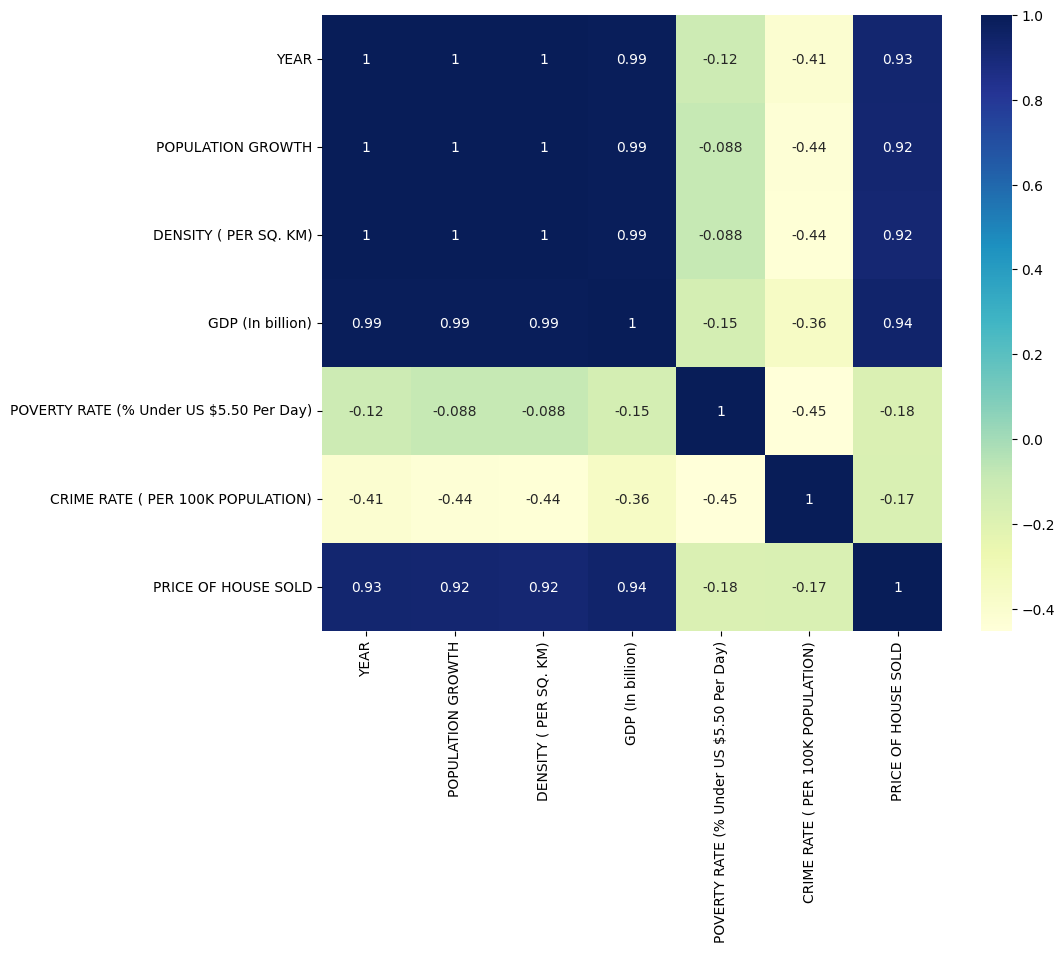

In [ ]:
# Printing a heatmap.

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')

* **There is high positive correlation in prices and (gdp, density, population growth and year.)**

In [ ]:
# Renaming our column's.

df = df.rename(columns={'YEAR':'yr','POPULATION GROWTH':'pg','GROWTH RATE':'gr','DENSITY ( PER SQ. KM)':'denst','GDP (In billion)':'gdp',
                        'POVERTY RATE (% Under US $5.50 Per Day)':'pr','NET MIGRATION RATE':'mr','ARABLE LAND (IN HAC)':'arland',
                        'CRIME RATE ( PER 100K POPULATION)':'cr','PRICE OF HOUSE SOLD':'price'})

<Axes: xlabel='price', ylabel='Density'>

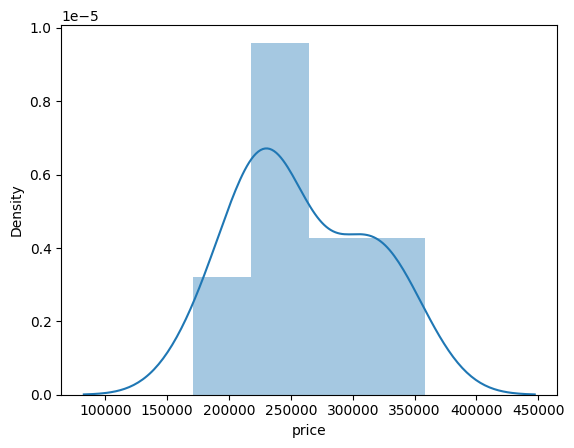

In [ ]:
# Distribution plot of our target variable.

sns.distplot(df['price'])

**Price column is following a almost normal distribution curve.**

Text(0, 0.5, 'Price')

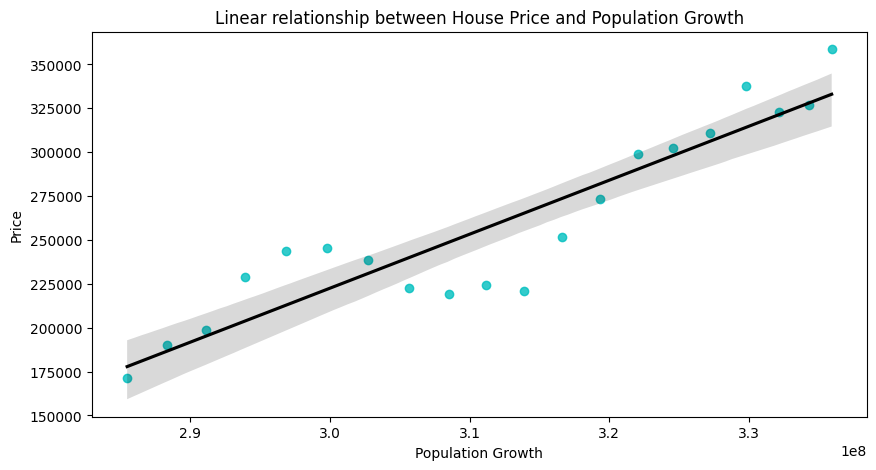

In [ ]:
# Regression plot.

plt.figure(figsize=(10,5))
sns.regplot(x=df['pg'],y=df['price'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between House Price and Population Growth')
plt.xlabel('Population Growth')
plt.ylabel('Price')

* **High positive correlation between price and population growth.**

* **Prices of houses will go up as population growth increases.**

Text(0, 0.5, 'Price')

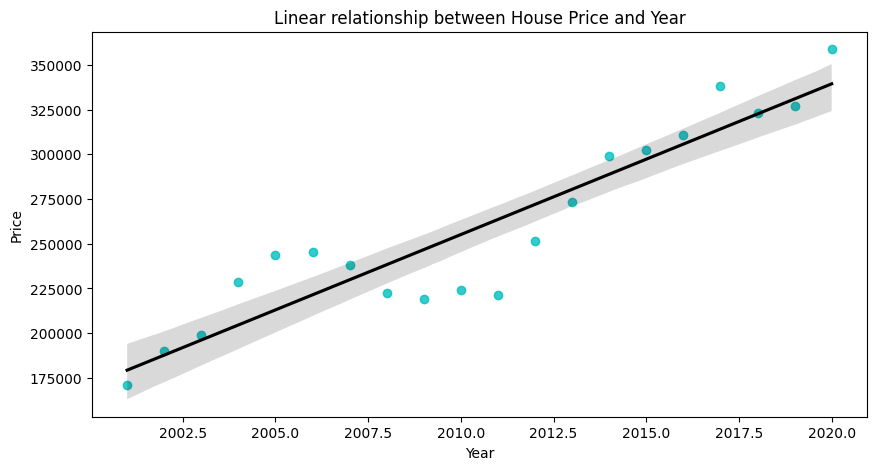

In [ ]:
# Regression plot.

plt.figure(figsize=(10,5))
sns.regplot(x=df['yr'],y=df['price'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between House Price and Year')
plt.xlabel('Year')
plt.ylabel('Price')

* **High positive correlation between price and year.**

* **The prices of houses will go up in the coming years.**

Text(0, 0.5, 'Price')

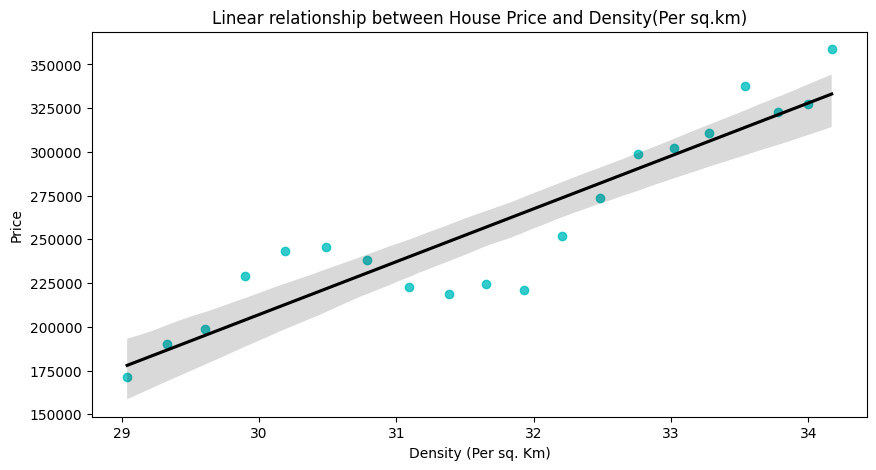

In [ ]:
# Regression plot.

plt.figure(figsize=(10,5))
sns.regplot(x=df['denst'],y=df['price'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between House Price and Density(Per sq.km)')
plt.xlabel('Density (Per sq. Km)')
plt.ylabel('Price')

* **High positive correlation between price and Density (per sq. km).**

* **The prices of houses will go up as the density of population increases per square kilometre.**

Text(0, 0.5, 'Price')

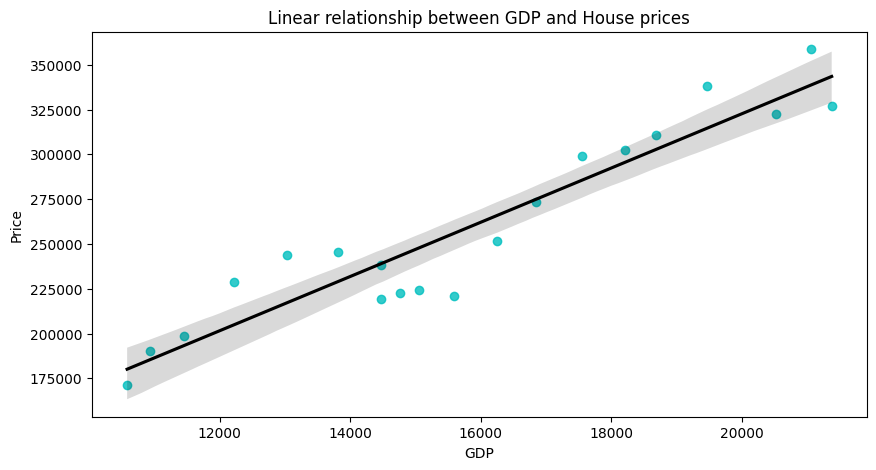

In [ ]:
# Regression plot.

plt.figure(figsize=(10,5))
sns.regplot(x=df['gdp'],y=df['price'],scatter_kws={'color':'c'},line_kws={'color':'black'})
plt.title('Linear relationship between GDP and House prices')
plt.xlabel('GDP')
plt.ylabel('Price')

* **High positive correlation between price and GDP.**

* **Household prices are directly proportional to the GDP of this country.**

In [ ]:
# Defining our input and output variables.

x = df.drop('price',axis = 1)

y = df['price']

In [ ]:
# Creating train test split.

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(x,y,test_size=.20,random_state=42)
print(Xtrain.shape)
print(Xtest.shape)

(16, 6)
(4, 6)


* **We have divided our data into a 80:20 training testing split.**

In [ ]:
# Test set

Xtest

,yr,pg,denst,gdp,pr,cr
0,2020,335942003,34.17,21060.47,0.012,6.42
17,2003,291109820,29.61,11456.44,0.020,5.52
15,2005,296842670,30.19,13039.20,0.017,5.63
1,2019,334319671,34.00,21380.98,0.017,4.99


**We are implementing linear regression on our data set to predict house prices by using our test set.**

In [ ]:
# Implementing linear regression model and checking training and testing accuracies.

lr = LinearRegression()
lr.fit(Xtrain,ytrain)
print('Training Accuracy -',lr.score(Xtrain,ytrain))
print('Testing Accuracy  -' ,lr.score(Xtest,ytest))

Training Accuracy - 0.9340884129330351
Testing Accuracy  - 0.8512914146044003


**We are getting training and testing accuracies of 93 and 85%.**

In [ ]:
# Price prediction on ouu test set.

ypred = pd.DataFrame(lr.predict(Xtest))
ypred

,0
0,370033.033859
1,200268.727681
2,212353.738217
3,363418.894113


* ***Above are the predicted house prices for our test data, which are accurate enough.***